### Types Of Transformation

- Normalization And Standardization
- Scaling to Minimum And Maximum values
- Scaling To Median And Quantiles
- Guassian Transformation
- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation Exponential Transformation
- Box Cox Transformation

### Standardization
#### We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

In [2]:
df=pd.read_csv('Datasets/titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
### Using StandardScalar from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
#### Fit V/S Fir_transform
df_scaled = sc.fit_transform(df)
df_scaled[0]

array([-0.78927234,  0.82737724, -0.56573646, -0.50244517])

In [7]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


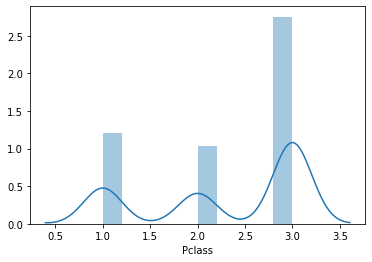

In [8]:
sns.distplot(df.Pclass, bins=10)

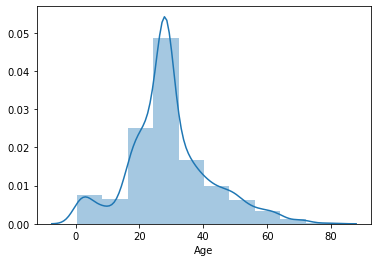

In [9]:
sns.distplot(df.Age, bins=10)

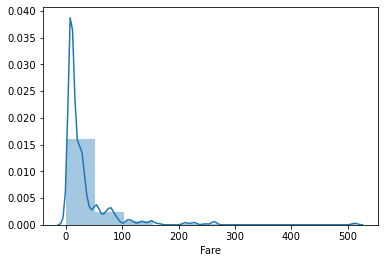

In [10]:
sns.distplot(df.Fare, bins=10)

### Min-Max Scaling
#### it scales the value from 0 and 1.

__Formula__: X_scaled = (X - X.min / (X.max - X.min))

In [11]:
mm = MinMaxScaler(feature_range=(0, 1))
mm

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
df_min_max_scaled = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_min_max_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


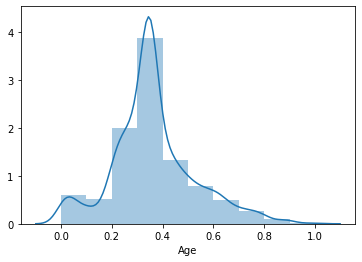

In [13]:
sns.distplot(df_min_max_scaled.Age, bins=10)

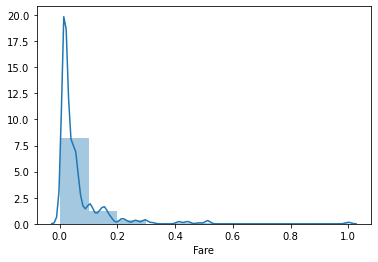

In [14]:
sns.distplot(df_min_max_scaled.Fare, bins=10)

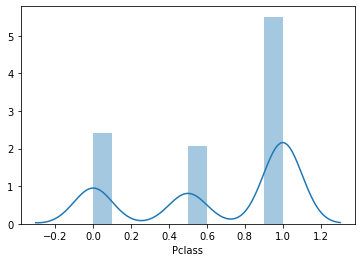

In [15]:
sns.distplot(df_min_max_scaled.Pclass, bins=10)

### Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
IQR = 75th quantile - 25th quantile

#### X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

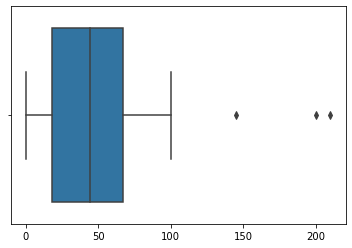

In [16]:
lst = pd.Series([0, 10, 20, 34,56,3,56,22,56,34,67,89,4,67,33,5,45,67,33,67,12,200, 210,145, 23,45,44,56,8,40,4,11,56,78,89,100])
sns.boxplot(lst)
plt.show()